# **Sayısal İntegrasyon: scipy.integrate**
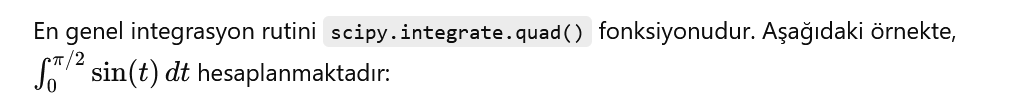

In [2]:
from scipy.integrate import quad  # quad fonksiyonunu scipy.integrate'den içe aktar

res, err = quad(np.sin, 0, np.pi/2)  # np.sin fonksiyonunun 0 ile pi/2 arasındaki integrali
# res: İntegral sonucu
# err: Hesaplanan hatanın tahmini

np.allclose(res, 1)  # Sonuç yaklaşık olarak 1 mi?
# Çıktı: True

np.allclose(err, 1 - res)  # Hata tahmini yaklaşık olarak doğru mu?
# Çıktı: True


True

# **Diferansiyel Denklemleri Entegre Etmek**
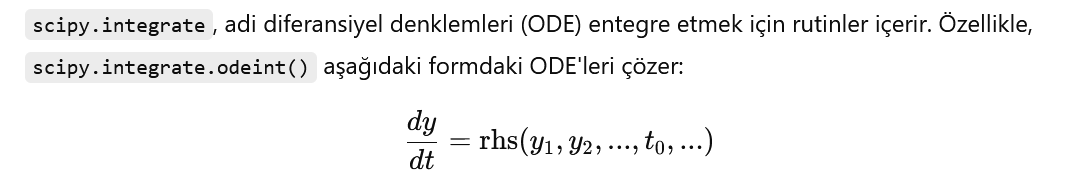
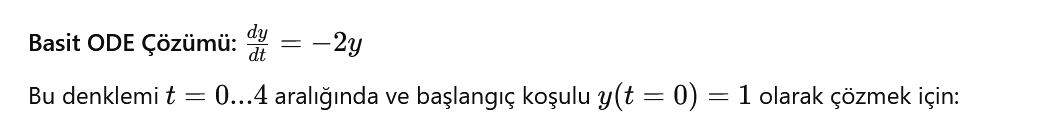

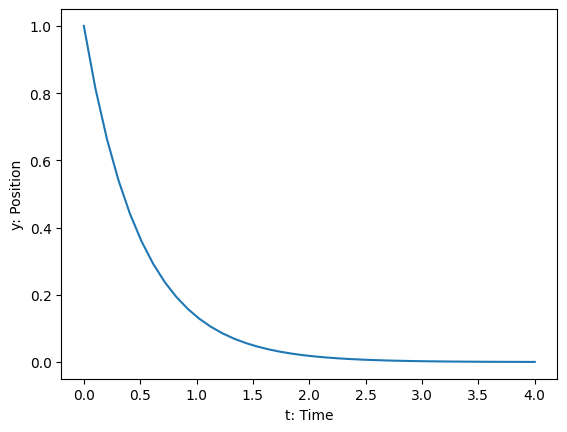

In [4]:
# Türev Fonksiyonu Tanımlama:

def calc_derivative(ypos, time):
    return -2 * ypos  # Türevi hesapla: -2y

# Zamanla yy'yi Hesaplama:

from scipy.integrate import odeint  # ODE çözüm fonksiyonunu içe aktar
time_vec = np.linspace(0, 4, 40)  # Zaman vektörünü 0 ile 4 arasında 40 adımda oluştur
y = odeint(calc_derivative, y0=1, t=time_vec)  # Diferansiyel denklemi çöz

#Sonuçları Çizme:

import matplotlib.pyplot as plt
plt.plot(time_vec, y)  # Zaman ve çözüm arasındaki ilişkiyi çiz
plt.xlabel("t: Time")  # X ekseni etiketi
plt.ylabel("y: Position")  # Y ekseni etiketi
plt.show()  # Grafiği göster



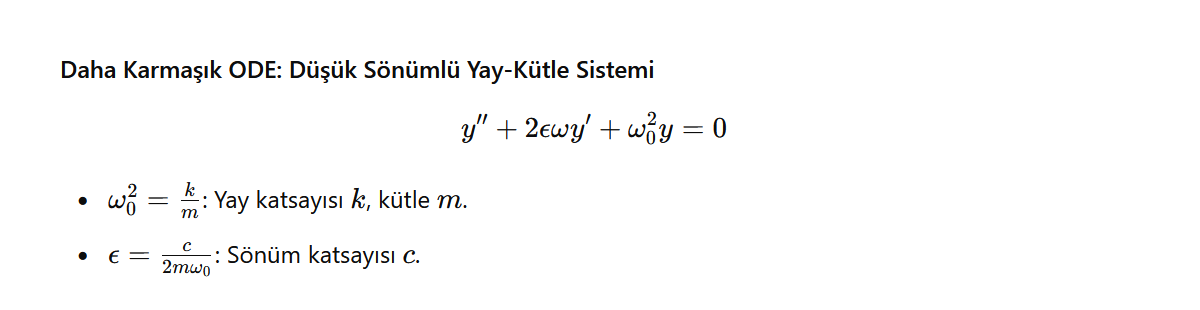

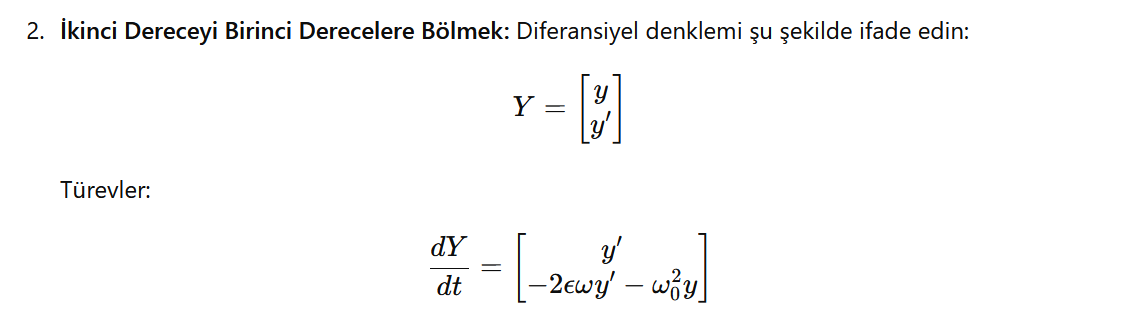

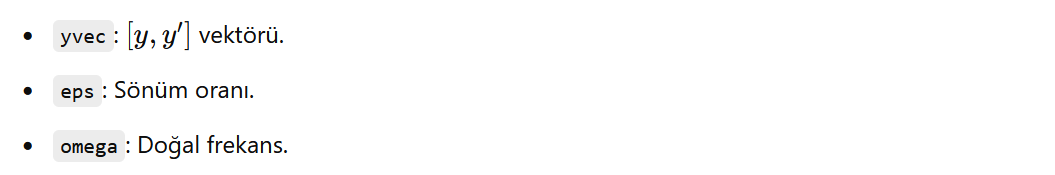

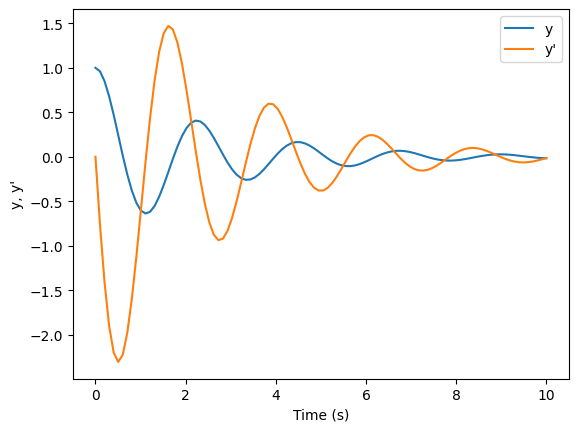

In [13]:
# 1. Parametreleri Tanımlayın:

mass = 0.5  # Kütle (kg)
kspring = 4  # Yay katsayısı (N/m)
cviscous = 0.4  # Sönüm katsayısı (N·s/m)

eps = cviscous / (2 * mass * np.sqrt(kspring / mass))  # Sönüm oranı
omega = np.sqrt(kspring / mass)  # Doğal frekans

# 3. Fonksiyon Tanımı:

def calc_deri(yvec, time, eps, omega):
    return [yvec[1], -2.0 * eps * omega * yvec[1] - omega**2 * yvec[0]]


# 4. Denklemi Çözmek:

time_vec = np.linspace(0, 10, 100)  # Zaman vektörü
yinit = [1, 0]  # Başlangıç değerleri: \( y(0) = 1, y'(0) = 0 \)
yarr = odeint(calc_deri, yinit, time_vec, args=(eps, omega))  # ODE çözümü


# 5. Sonuçları Çizmek:

plt.plot(time_vec, yarr[:, 0], label="y")  # Pozisyon (y)
plt.plot(time_vec, yarr[:, 1], label="y'")  # Hız (y')
plt.xlabel("Time (s)")  # X ekseni
plt.ylabel("y, y'")  # Y ekseni
plt.legend()  # Etiketler
plt.show()  # Grafiği göster

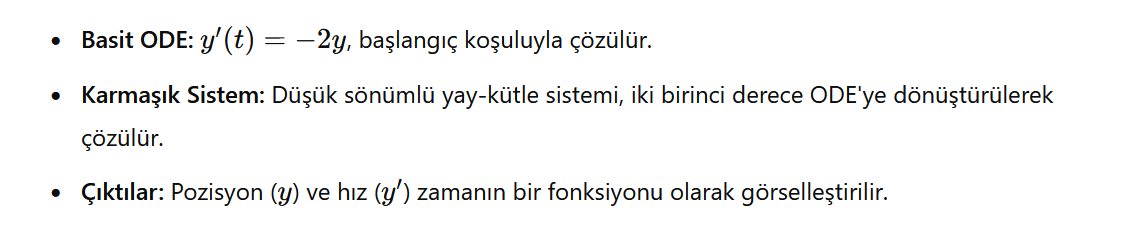

# **Hızlı Fourier Dönüşümleri: scipy.fftpack**

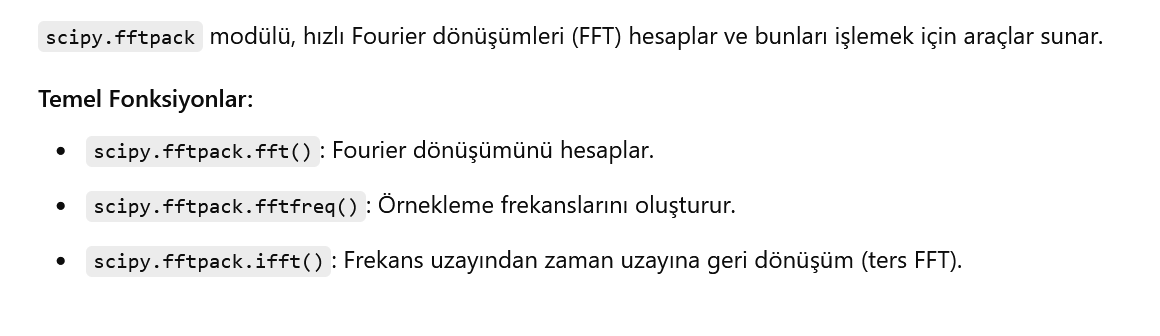
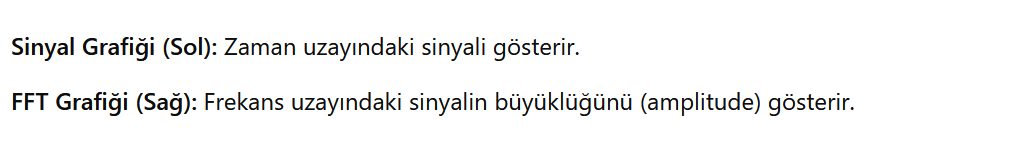

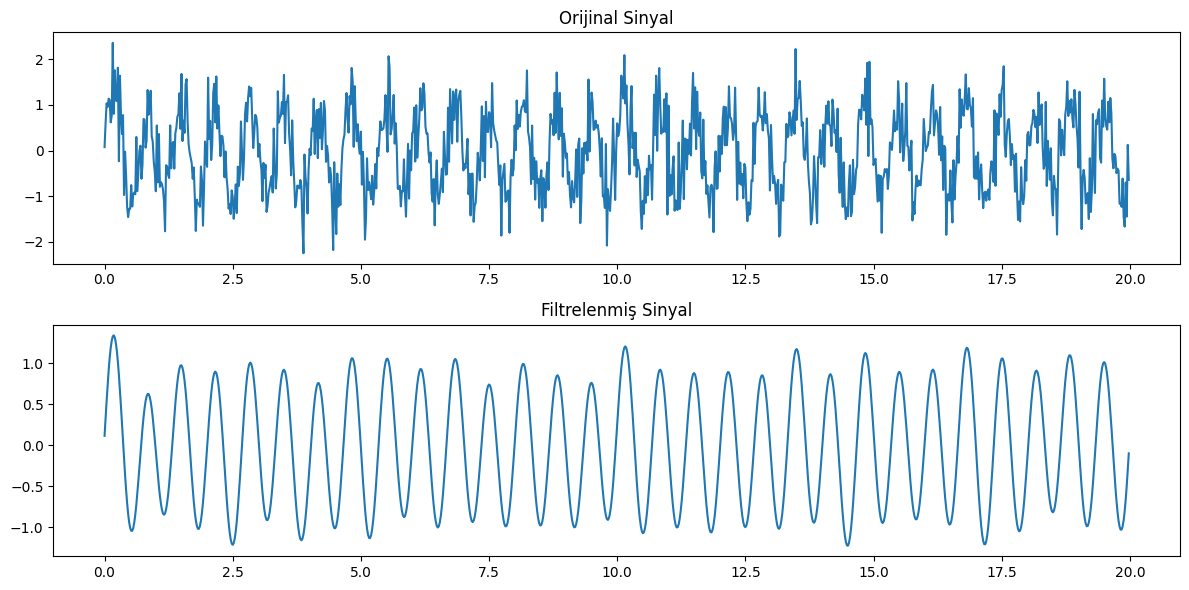

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

# 1. Gürültülü sinyal oluştur
time_step = 0.02  # Zaman aralığı
time_vec = np.arange(0, 20, time_step)  # Zaman vektörü
sig = np.sin(2 * np.pi * 1.5 * time_vec) + 0.5 * np.random.randn(time_vec.size)  # Gürültülü sinyal

# 2. Fourier dönüşümü
sig_fft = fftpack.fft(sig)  # FFT # Sinyalin Fourier dönüşümünü hesapla
freqs = fftpack.fftfreq(sig.size, d=time_step)  # Frekans ekseni # Frekansları hesapla

# 3. Tepe frekansını bul
peak_freq = freqs[np.argmax(np.abs(sig_fft))]

# 4. Gürültü frekanslarını sıfırla
sig_fft[np.abs(freqs) > peak_freq] = 0

# 5. Ters FFT ile filtreleme
filtered_sig = fftpack.ifft(sig_fft)

# 6. Grafikleri çiz
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time_vec, sig, label="Gürültülü Sinyal")
plt.title("Orijinal Sinyal")
plt.subplot(2, 1, 2)
plt.plot(time_vec, filtered_sig.real, label="Filtrelenmiş Sinyal")
plt.title("Filtrelenmiş Sinyal")
plt.tight_layout()
plt.show()


#### **Tam Çalışan Örnekler:**
1. **Kaba Periyodiklik Bulma:** Bir sinyaldeki belirgin periyodiklikleri keşfetme.
2. **Gaussian Görüntü Bulanıklığı:** Görüntü üzerinde Gaussian filtresi uygulayarak bulanıklaştırma.

#### **Egzersiz: Moon Landing Görüntüsünün Gürültüsünü Azaltma**
1. **Verilen Görüntüyü İnceleyin:** 
   Görüntü, periyodik gürültülerle oldukça kirlenmiştir.
   
2. **Görüntüyü Yükleyin:**
   `matplotlib.pyplot.imread()` kullanarak görüntüyü yükleyin.

3. **2D FFT Fonksiyonunu Kullanın:**
   - `scipy.fftpack` kullanarak görüntünün Fourier spektrumunu hesaplayın.
   - Spektrumu çizin ve inceleyin.

4. **Gürültüyü Azaltmak için Frekans Bileşenlerini Sıfırlayın:**
   - Yüksek frekanslı bileşenlerden bazılarını sıfırlayın (örneğin, `array slicing` kullanarak).

5. **Ters Fourier Dönüşümü Uygulayın:**
   - Spektrumu tekrar zaman/görüntü uzayına dönüştürerek temizlenmiş görüntüyü oluşturun.

---

### **Detaylı Açıklama**

#### 1. Görüntüyü Yükleyip Görüntüleme
```python
import numpy as np
import matplotlib.pyplot as plt

# Görüntüyü yükle ve göster
im = plt.imread('moonlanding.png').astype(float)

plt.figure()
plt.imshow(im, cmap='gray')  # Orijinal görüntü gri tonlamalı
plt.title('Orijinal Görüntü')
plt.show()
```
- **Amaç:** Görüntüyü orijinal haliyle görüntülemek.

---

#### 2. 2D FFT Uygulama ve Spektrumu Çizme
```python
from scipy import fftpack

# 2D FFT hesapla
im_fft = fftpack.fft2(im)

# Spektrum Görselleştirme
def plot_spectrum(im_fft):
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5), cmap='viridis')
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier Transform (Spektrum)')
plt.show()
```
- **`fft2`:** Görüntünün frekans uzayındaki dönüşümünü sağlar.
- **Spektrum Analizi:** Yüksek frekanslı bileşenler genellikle gürültüyü temsil eder.

---

#### 3. Frekans Bileşenlerini Filtreleme
```python
# Filtreleme için spektrumu kopyala
im_fft2 = im_fft.copy()

# Yüksek frekansları sıfırla
keep_fraction = 0.1
r, c = im_fft2.shape
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

# Filtrelenmiş spektrumu görselleştir
plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtrelenmiş Spektrum')
plt.show()
```
- **`keep_fraction`:** Frekansların ne kadarını tutacağınızı kontrol eder (örneğin, %10).
- **Filtreleme:** Yüksek frekansları sıfırlayarak gürültüyü temizler.

---

#### 4. Ters FFT ile Görüntüyü Rekonstrükte Etme
```python
# Ters FFT uygula ve yeniden görüntü oluştur
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, cmap='gray')
plt.title('Geri Yüklenmiş Görüntü')
plt.show()
```
- **`ifft2`:** Spektrumu zaman/görüntü uzayına geri dönüştürür.
- **Sonuç:** Gürültüden temizlenmiş bir görüntü elde edilir.

---

#### 5. Gaussian Filtresi ile Alternatif Yöntem
```python
from scipy.ndimage import gaussian_filter

# Gaussian filtre uygula
im_blur = gaussian_filter(im, sigma=4)

plt.figure()
plt.imshow(im_blur, cmap='gray')
plt.title('Gaussian Filtresi ile Bulanık Görüntü')
plt.show()
```
- **Gaussian Filtre:** Daha basit ve hızlı bir yöntemdir.

---

### **Sonuç ve Çıktılar**
1. **Orijinal Görüntü:** Gürültü ile dolu.
2. **Fourier Spektrumu:** Görüntünün frekans bileşenleri incelenir.
3. **Filtrelenmiş Görüntü:** Frekans bileşenlerini temizledikten sonra daha net görüntü.
4. **Gaussian Filtre:** Gürültüyü azaltmanın hızlı bir alternatifi.


# **Sinyal İşleme: scipy.signal**

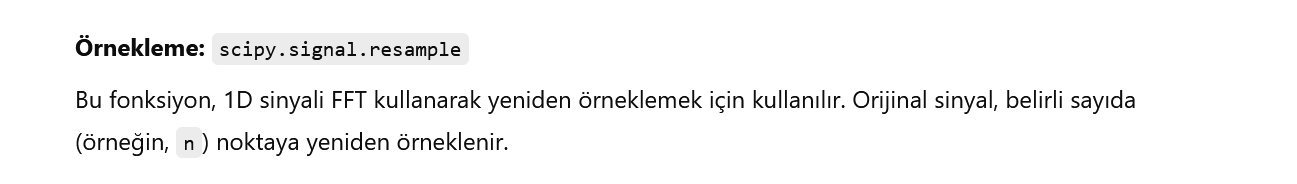

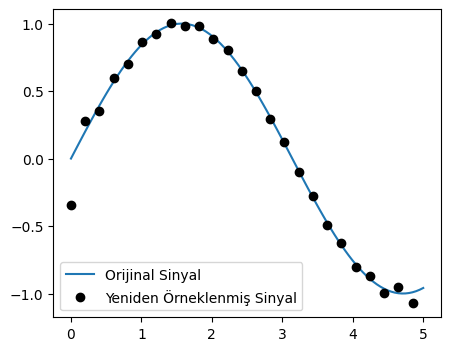

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 1. Zaman aralığı ve sinyal oluşturma
t = np.linspace(0, 5, 100)  # 0 ile 5 arasında 100 noktalı bir zaman dizisi
x = np.sin(t)  # Sinyal: sinüs dalgası

# 2. Sinyali yeniden örnekleme
x_resampled = signal.resample(x, 25)  # FFT ile 25 noktaya yeniden örnekleme

# 3. Orijinal ve yeniden örneklenmiş sinyali çiz
plt.figure(figsize=(5, 4))
plt.plot(t, x, label="Orijinal Sinyal")  # Orijinal sinyal
plt.plot(t[::4], x_resampled, "ko", label="Yeniden Örneklenmiş Sinyal")  # Yeniden örneklenmiş sinyal
plt.legend(loc="best")
plt.show()


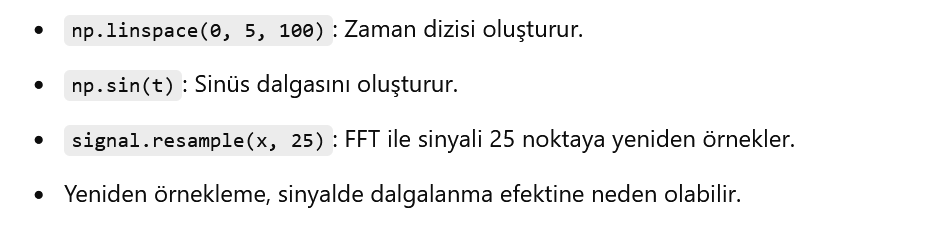

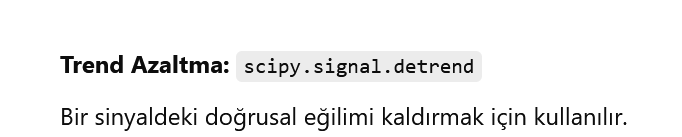
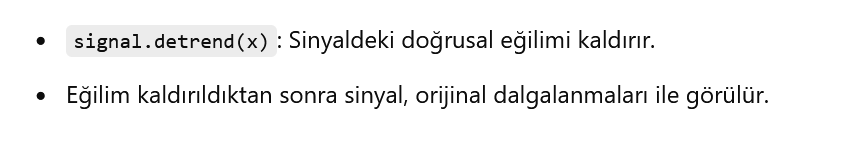

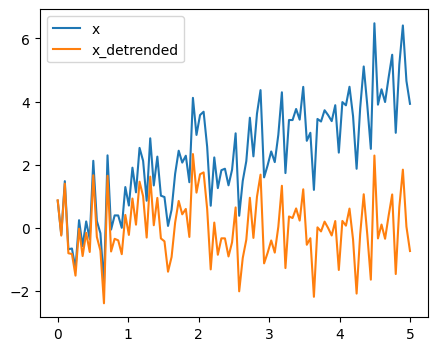

In [21]:
# 1. Trendli rastgele bir sinyal oluşturma
t = np.linspace(0, 5, 100)  # Zaman dizisi
x = t + np.random.normal(size=100)  # Trend eklenmiş rastgele sinyal

# 2. Eğilimi kaldır
x_detrended = signal.detrend(x)  # Doğrusal eğilimi kaldır

# 3. Sinyali çiz
plt.figure(figsize=(5, 4))
plt.plot(t, x, label="x")  # Orijinal sinyal
plt.plot(t, x_detrended, label="x_detrended")  # Eğilim azaltılmış sinyal
plt.legend(loc="best")
plt.show()


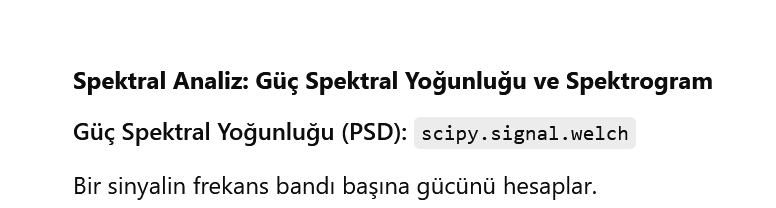


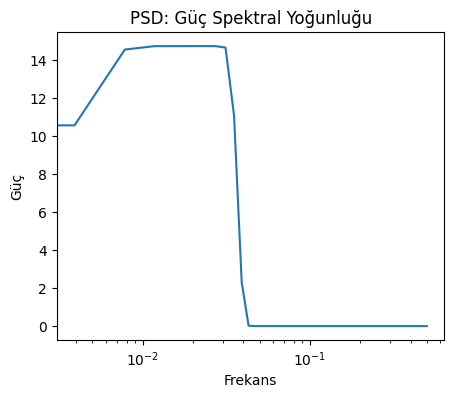

In [22]:
from scipy.signal import welch

# 1. Sinyal oluşturma
np.random.seed(0)
time_step = 0.01
time_vec = np.arange(0, 70, time_step)
sig = np.sin(0.5 * np.pi * time_vec * (1 + 0.1 * time_vec))  # Değişen frekanslı sinyal

# 2. Güç spektral yoğunluğunu hesapla
freqs, psd = welch(sig)

# 3. Güç spektral yoğunluğunu çiz
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title("PSD: Güç Spektral Yoğunluğu")
plt.xlabel("Frekans")
plt.ylabel("Güç")
plt.show()


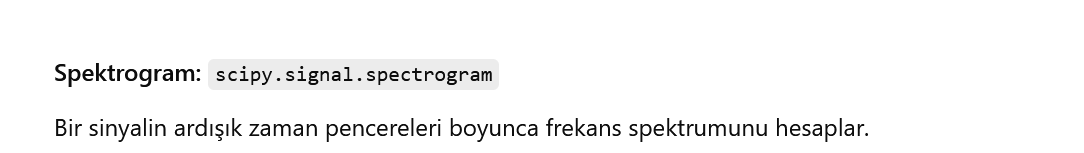

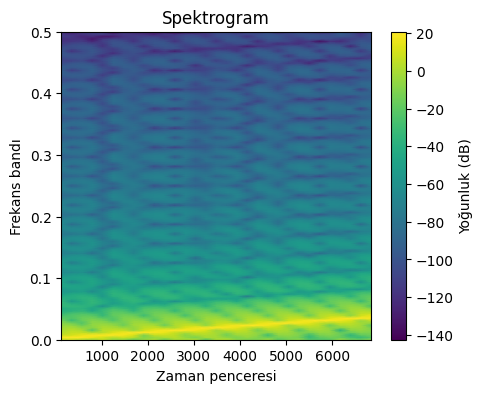

In [23]:
from scipy.signal import spectrogram

# 1. Spektrogramı hesapla
freqs, times, Sxx = spectrogram(sig)

# 2. Spektrogramı görselleştir
plt.figure(figsize=(5, 4))
plt.pcolormesh(times, freqs, 10 * np.log10(Sxx), shading='gouraud')
plt.title("Spektrogram")
plt.ylabel("Frekans bandı")
plt.xlabel("Zaman penceresi")
plt.colorbar(label="Yoğunluk (dB)")
plt.show()


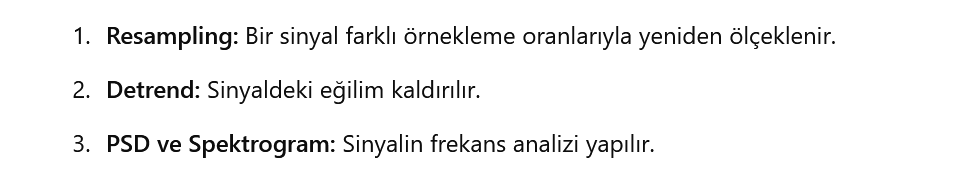